In [1]:
import sys

import matplotlib.pyplot as plt

from dysts.flows import *
from dysts.utils import *

%load_ext autoreload
%autoreload 2

In [2]:
xx, yy = np.meshgrid(0.0 + np.linspace(-.1, .1, 30),  0.101 + np.linspace(-.1, .1, 30))
xx, yy = np.ravel(xx), np.ravel(yy)


# xx, yy = np.meshgrid(np.linspace(-1, 1, 30),  0.101 + np.linspace(-1, 1, 30))
# xx, yy = np.ravel(xx), np.ravel(yy)

xx += np.random.random(xx.shape) * 1e-3
yy += np.random.random(xx.shape) * 1e-3

thth = np.arctan2(yy, xx)
rr = np.sqrt(xx**2 + yy**2)

In [3]:


eq = BlinkingVortex()
eq.dt = 1e-3

all_traj = list()
for ic in zip(rr, thth):
    eq.ic = ic
    sol = eq.make_trajectory(1600)
    all_traj.append(sol)
all_traj = np.dstack(all_traj).T
all_traj_xy = np.dstack([all_traj[..., 0] * np.cos(all_traj[..., 1]), 
                        all_traj[..., 0] * np.sin(all_traj[..., 1])])

In [12]:
eq.tau

3

(-1.0, 1.0)

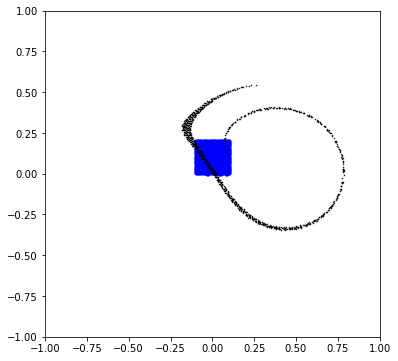

In [4]:
plt.figure(figsize=(6, 6))
plt.plot(all_traj_xy[:, 0, 0], all_traj_xy[:, 0, 1], '.b');
plt.plot(all_traj_xy[:, -1, 0], all_traj_xy[:, -1, 1], '.k', markersize=1);
plt.xlim([-1, 1])
plt.ylim([-1, 1])

(-1.0, 1.0)

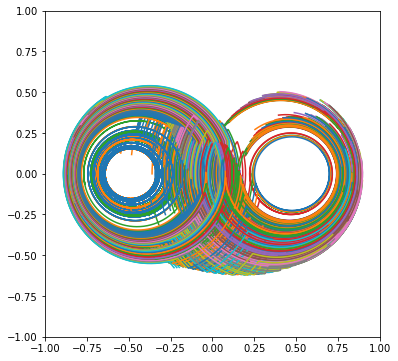

In [8]:
plt.figure(figsize=(6, 6))

for sol in all_traj:
# plt.plot(sol[0, 0] * np.cos(sol[1, 0]), sol[0, 0] * np.sin(sol[1, 0]), '.b')
    plt.plot(sol[:, 0] * np.cos(sol[:, 1]), sol[:, 0] * np.sin(sol[:, 1]))
plt.xlim([-1, 1])
plt.ylim([-1, 1])

(-1.0, 1.0)

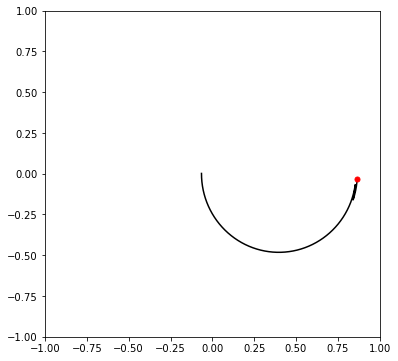

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(all_traj_xy[5, :, 0], all_traj_xy[5, :, 1], 'k');
plt.plot(all_traj_xy[5, -1, 0], all_traj_xy[5, -1, 1], '.r', markersize=10);
plt.xlim([-1, 1])
plt.ylim([-1, 1])

(-1.0, 1.0)

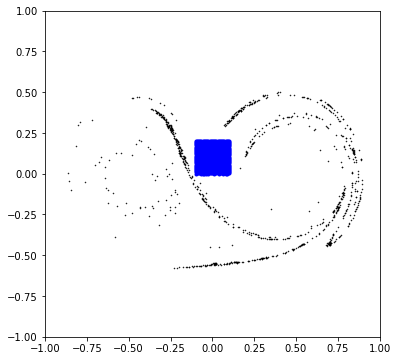

(-1.0, 1.0)

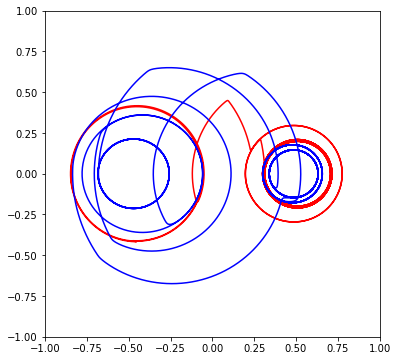

In [10]:
## Simulate a single example
eq = BlinkingRotlet()
sol = eq.make_trajectory(6000)

plt.figure(figsize=(6, 6))
plt.plot(sol[0] * np.cos(sol[1]), sol[0] * np.sin(sol[1]), 'r')
plt.xlim([-1, 1])
plt.ylim([-1, 1])


eq = BlinkingVortex()
sol = eq.make_trajectory(6000)

plt.plot(sol[0] * np.cos(sol[1]), sol[0] * np.sin(sol[1]), 'b')
plt.xlim([-1, 1])
plt.ylim([-1, 1])

# plt.plot(sol[0][-50000:] * np.cos(sol[1][-50000:]), sol[0][-50000:] * np.sin(sol[1][-50000:]))
# plt.plot(sol[0][-50000::])